In [2]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

In [3]:
from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio
from langsmith import traceable, trace

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks.
Answer all the questions asked by the user diligently.
If you don't know the answer, just say that you don't know.
"""

openai_client = OpenAI()
nest_asyncio.apply()

def generate_response(question: str):
    with trace(
        name="Generate Response", 
        run_type="chain",
        inputs={"question": question},
        metadata={"foo": "bar"},
    ) as ls_trace:
        messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Question: {question}"
        }
        ]
        response = call_openai(messages)
        ls_trace.end(outputs={"output": response})
    
    return response

@traceable()
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_rag(question: str):
    response = generate_response(question)
    return response.choices[0].message.content

@traceable
def chat_bot():
    print("This is a simple chatbot. Type 'exit' to quit.\n")
    
    while True:
        ques = input("Enter the question: ")
        print(f"Question: {ques}")
        
        if ques.lower() == 'exit':
            print("Exiting the chatbot. Goodbye!")
            break
        
        response = langsmith_rag(ques)
        print(f"AI: {response}\n")


chat_bot()

This is a simple chatbot. Type 'exit' to quit.

Question: who is Batman?
AI: Batman is a fictional superhero created by artist Bob Kane and writer Bill Finger. He first appeared in Detective Comics #27 in 1939. Batman's real identity is Bruce Wayne, a wealthy industrialist and philanthropist who fights crime in Gotham City. After witnessing the murder of his parents as a child, Bruce Wayne dedicates his life to combating crime and injustice, using his intellect, physical prowess, and an array of high-tech gadgets. Unlike many other superheroes, Batman does not possess superhuman powers; instead, he relies on his training, detective skills, and resources. He is a prominent character in DC Comics and has appeared in various comic books, television shows, and films.

Question: is Ironman richer than Batman
AI: Iron Man (Tony Stark) and Batman (Bruce Wayne) are both depicted as extremely wealthy characters in their respective universes. However, estimates of their wealth can vary widely de

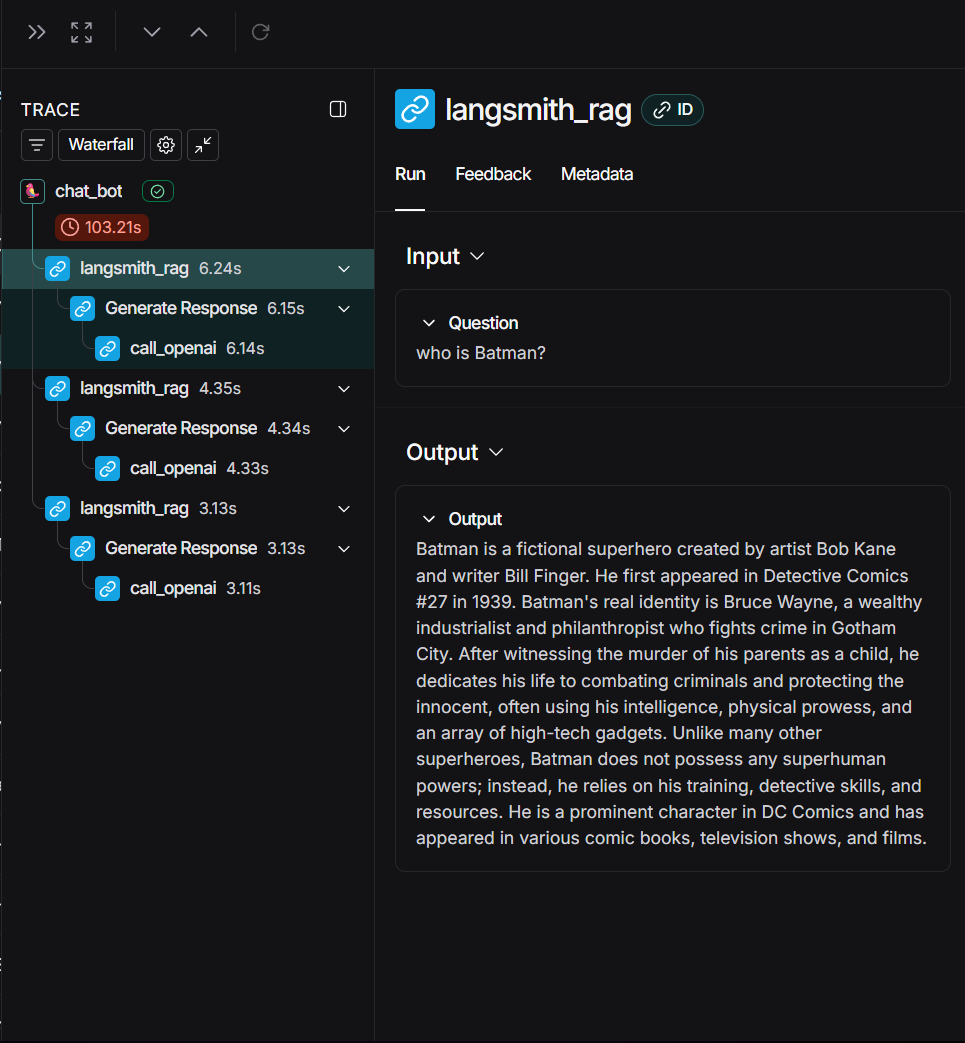

In [4]:
from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio
from langsmith import traceable, trace
from langsmith.wrappers import wrap_openai

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks.
Answer all the questions asked by the user diligently.
If you don't know the answer, just say that you don't know.
"""

openai_client = wrap_openai(OpenAI())
nest_asyncio.apply()

def generate_response(question: str):
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Question: {question}"
        }
    ]
    
    return openai_client.chat.completions.create(
        model=MODEL_NAME,
        messages=messages,
    )
    
    return response

@traceable()
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def chat_bot():
    print("This is a simple chatbot. Type 'exit' to quit.\n")
    
    while True:
        ques = input("Enter the question: ")
        print(f"Question: {ques}")
        
        if ques.lower() == 'exit':
            print("Exiting the chatbot. Goodbye!")
            break
        
        response = langsmith_rag(ques)
        print(f"AI: {response}\n")


chat_bot()

This is a simple chatbot. Type 'exit' to quit.

Question: which year did the movie "Avatar" come out?
AI: The movie "Avatar" was released in 2009.

Question: which is the highest grossing movie of all time?
AI: As of October 2023, the highest-grossing movie of all time is "Avatar," directed by James Cameron. It has grossed over $2.9 billion worldwide.

Question: who is regarded as the "GOAT" of football?
AI: The title of "GOAT" (Greatest of All Time) in football is often debated, but two players frequently mentioned in this context are Lionel Messi and Cristiano Ronaldo. Each has a strong case due to their exceptional records, skill, and impact on the game. Ultimately, the choice of who is regarded as the GOAT can vary depending on personal preferences and criteria.

Question: would you agree that Messi is better than Pele?
AI: Comparing Messi and Pelé is subjective and often depends on personal opinions and criteria for greatness. Some might argue Messi's contemporary achievements, re

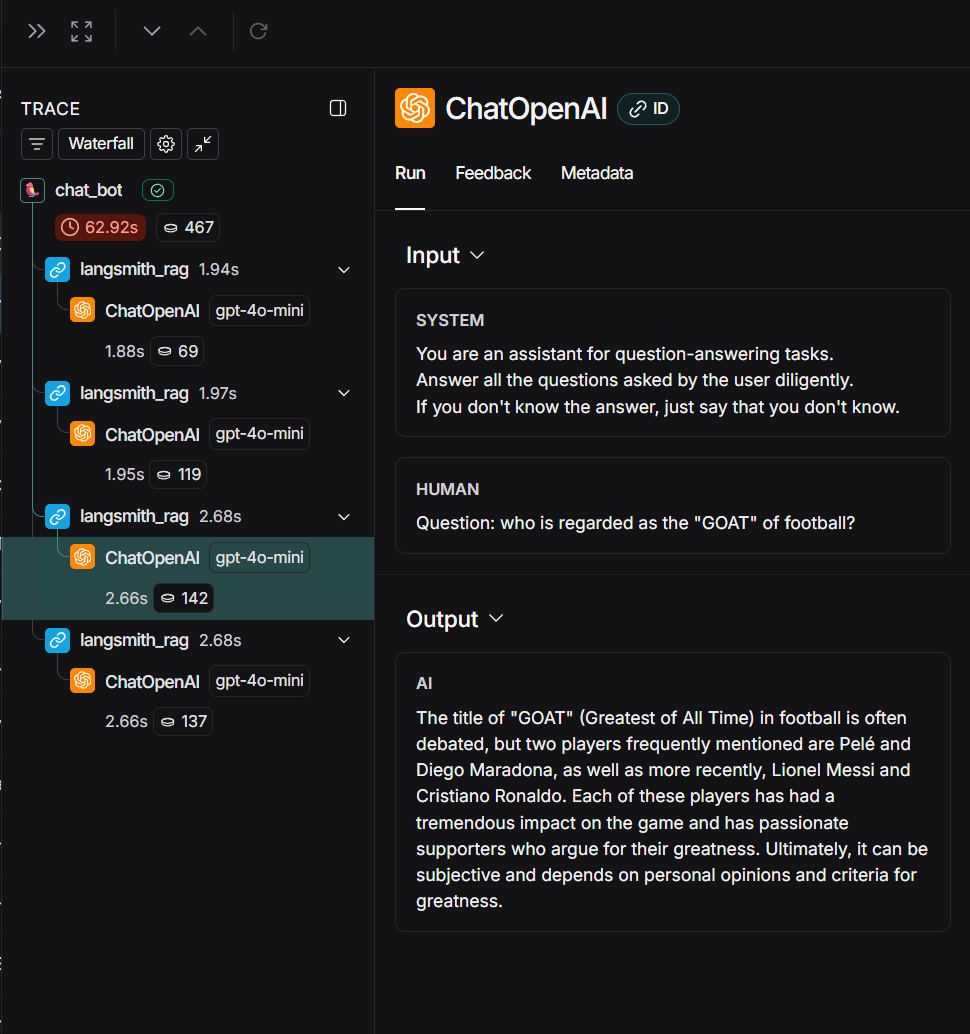